<a href="https://colab.research.google.com/github/AslanDevbrat/Robotics/blob/master/Robo_assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Devbrat Anuragi
## 17078

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Q1. Attractive Potential of the Goal

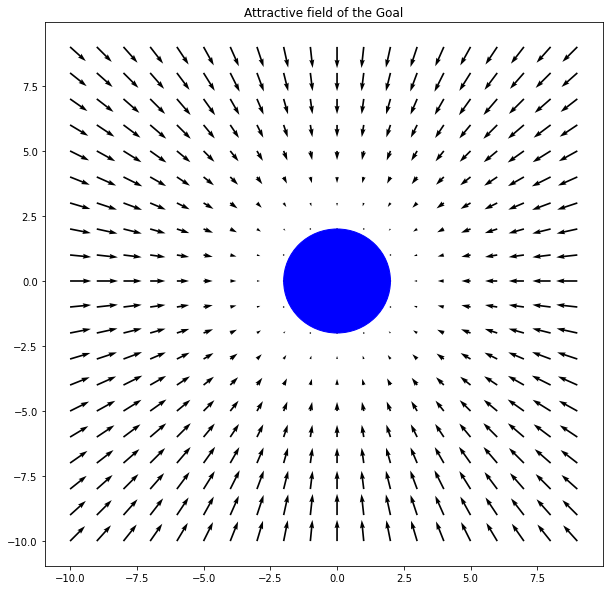

In [116]:
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)

X, Y = np.meshgrid(x,y)
delx = np.zeros_like(X)
dely = np.zeros_like(Y)
s = 7
r=2
for i in range(len(x)):
  for j in range(len(y)):
    
    d= np.sqrt(X[i][j]**2 + Y[i][j]**2)
    #print(f"{i} and {j}")
    theta = np.arctan2(Y[i][j],X[i][j])
    if d< 2:
      delx[i][j] = 0
      dely[i][j] =0
    elif d>r+s:
      delx[i][j] = -50* s *np.cos(theta)
      dely[i][j] = -50 * s *np.sin(theta)
    else:
      delx[i][j] = -50 * (d-r) *np.cos(theta)
      dely[i][j] = -50 * (d-r) *np.sin(theta)

fig, ax = plt.subplots(figsize = (10,10))
ax.quiver(X, Y, delx, dely)
ax.add_patch(plt.Circle((0, 0), 2, color='b'))
ax.set_title('Attractive field of the Goal')
plt.show() 

## Q2. Repulsive potential fields of the obstacles

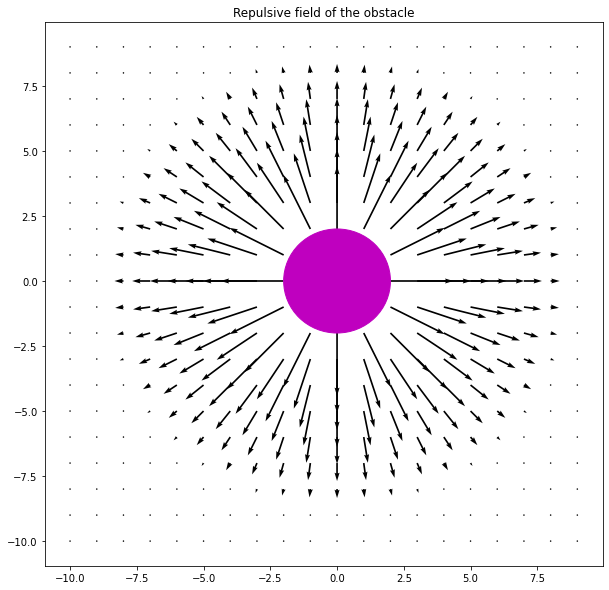

In [115]:
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)

X, Y = np.meshgrid(x,y)
delx = np.zeros_like(X)
dely = np.zeros_like(Y)
s = 7
r=2
for i in range(len(x)):
  for j in range(len(y)):
    
    d= np.sqrt(X[i][j]**2 + Y[i][j]**2)
    #print(f"{i} and {j}")
    theta = np.arctan2(Y[i][j],X[i][j])
    if d< 2:
      delx[i][j] = np.sign(np.cos(theta))
      dely[i][j] = np.sign(np.cos(theta))
    elif d>r+s:
      delx[i][j] = 0
      dely[i][j] = 0
    else:
      delx[i][j] = 50 *(s+r-d)* np.cos(theta)
      dely[i][j] = 50 * (s+r-d)*  np.sin(theta)

fig, ax = plt.subplots(figsize = (10,10))
ax.quiver(X, Y, delx, dely)
ax.add_patch(plt.Circle((0, 0), 2, color='m'))
ax.set_title('Repulsive field of the obstacle')
plt.show() 

## Q3. Combined Field when Goal and Obstacle are at the origin

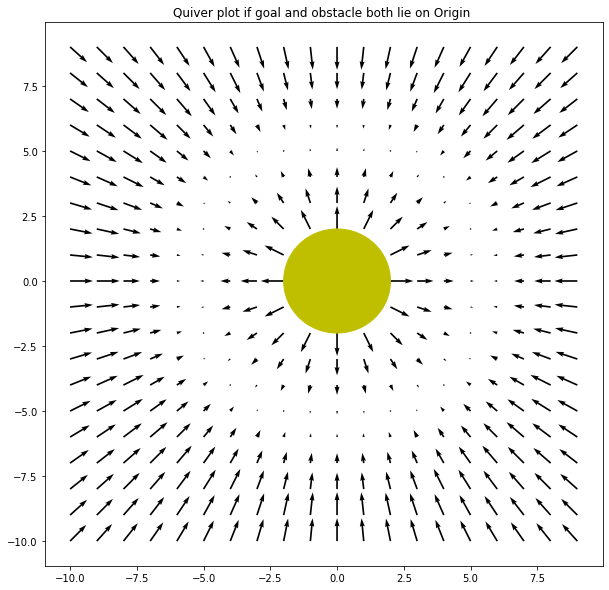

In [41]:
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)

X, Y = np.meshgrid(x,y)
delx = np.zeros_like(X)
dely = np.zeros_like(Y)
s = 7
r=2
for i in range(len(x)):
  for j in range(len(y)):
    
    d= np.sqrt(X[i][j]**2 + Y[i][j]**2)
    #print(f"{i} and {j}")
    theta = np.arctan2(Y[i][j],X[i][j])
    if d< 2:
      delx[i][j] = np.sign(np.cos(theta)) +0
      dely[i][j] = np.sign(np.cos(theta)) +0
    elif d>r+s:
      delx[i][j] = 0 +(-50 * s *np.cos(theta))
      dely[i][j] = 0 + (-50 * s *np.sin(theta))
    else:
      delx[i][j] = 50 *(s+r-d)* np.cos(theta) + (-50 * (d-r) *np.cos(theta))
      dely[i][j] = 50 * (s+r-d)*  np.sin(theta) + (-50 * (d-r) *np.sin(theta))

fig, ax = plt.subplots(figsize = (10,10))
ax.quiver(X, Y, delx, dely)
ax.add_patch(plt.Circle((0, 0), 2, color='y'))
ax.set_title('Quiver plot if goal and obstacle both lie on Origin ')
plt.show() 

## Combined Potential If obstacle and Goal are at different location

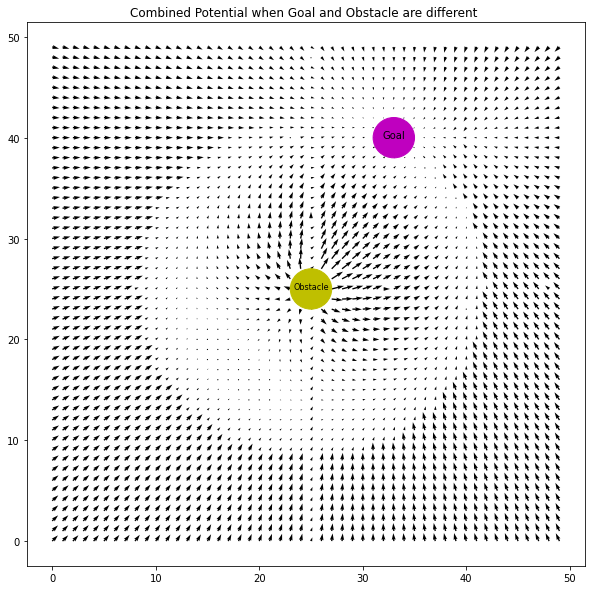

In [113]:
x = np.arange(-0,50,1)
y = np.arange(-0,50,1)

goal = [40,40]
obstacle = [25,25]
X, Y = np.meshgrid(x,y)

delx = np.zeros_like(X)
dely = np.zeros_like(Y)
s = 15
r=2
for i in range(len(x)):
  for j in range(len(y)):
    
    d_goal = np.sqrt((goal[0]-X[i][j])**2 + ((goal[1]-Y[i][j]))**2)
    d_obstacle = np.sqrt((obstacle[0]-X[i][j])**2 + (obstacle[1]-Y[i][j])**2)
    #print(f"{i} and {j}")
    theta_goal= np.arctan2(goal[1] - Y[i][j], goal[0]  - X[i][j])
    theta_obstacle = np.arctan2(obstacle[1] - Y[i][j], obstacle[0]  - X[i][j])
    if d_obstacle < r:
      delx[i][j] = np.sign(np.cos(theta_obstacle)) +0
      dely[i][j] = np.sign(np.cos(theta_obstacle))  +0
    elif d_obstacle>r+s:
      delx[i][j] = 0 +(50 * s *np.cos(theta_obstacle))
      dely[i][j] = 0 + (50 * s *np.sin(theta_goal))
    elif d_obstacle<r+s :
      delx[i][j] = -120 *(s+r-d_obstacle)* np.cos(theta_obstacle)
      dely[i][j] = -120 * (s+r-d_obstacle)*  np.sin(theta_obstacle) 
    if d_goal <r+s:
      if delx[i][j] != 0:
        delx[i][j]  += (50 * (d_goal-r) *np.cos(theta_goal))
        dely[i][j]  += (50 * (d_goal-r) *np.sin(theta_goal))
      else:
        delx[i][j]  = (50 * (d_goal-r) *np.cos(theta_goal))
        dely[i][j]  = (50 * (d_goal-r) *np.sin(theta_goal))
        
    if d_goal>r+s:
      if delx[i][j] != 0:
        delx[i][j] += 50* s *np.cos(theta_goal)
        dely[i][j] += 50* s *np.sin(theta_goal)
      else:
        delx[i][j] = 50* s *np.cos(theta_goal)
        dely[i][j] = 50* s *np.sin(theta_goal)

fig, ax = plt.subplots(figsize=(10,10))
ax.quiver(X, Y, delx, dely)
ax.add_patch(plt.Circle((25, 25), r, color='y'))
ax.add_patch(plt.Circle((33, 40), r, color='m'))

ax.annotate("Obstacle", xy=(25, 25), fontsize=8, ha="center")
ax.annotate("Goal", xy=(33, 40), fontsize=10, ha="center")

ax.set_title('Combined Potential when Goal and Obstacle are different ')

plt.show() 

## Q4. Path taken by the Rot from (0,0)

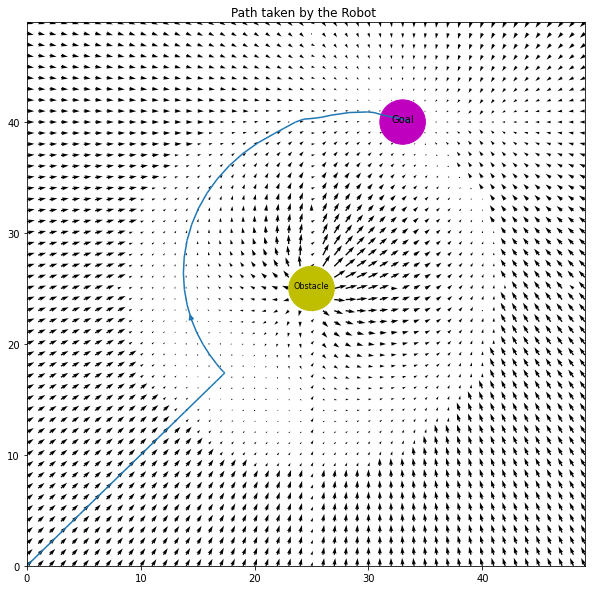

In [112]:
fig, ax = plt.subplots(figsize=(10,10))

seek_points = np.array([[0,0], 
                        [ 0,0]]) 
ax.streamplot(X,Y,delx,dely, start_points=seek_points)
ax.quiver(X, Y, delx, dely)
ax.add_patch(plt.Circle((25, 25), r, color='y'))
ax.add_patch(plt.Circle((33, 40), r, color='m'))

ax.annotate("Obstacle", xy=(25, 25), fontsize=8, ha="center")
ax.annotate("Goal", xy=(33, 40), fontsize=10, ha="center")

ax.set_title('Path taken by the Robot ')

plt.show() 


In [94]:
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j] 
U = -1 - X**2 + Y 
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2) 
  
fig = plt.figure(figsize =(24, 20)) 
gs = gridspec.GridSpec(nrows = 3, ncols = 2, 
                       height_ratios =[1, 1, 2]) 
  
# Controlling the starting points 
# of the streamlines 
seek_points = np.array([[-2, -1, 0, 1, 2, -1], 
                        [-2, -1,  0, 1, 2, 2]]) 

<Figure size 1728x1440 with 0 Axes>

In [99]:
print(V.shape)

(100, 100)
